<a href="https://colab.research.google.com/github/rosanmohan/Weather_forecasting_notebook/blob/main/Weather_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import prophet
from prophet import Prophet

from datetime import datetime

In [77]:
df_train=pd.read_csv('/content/drive/MyDrive/All_Datasets/Weather_forecasting/DailyDelhiClimateTrain.csv')
df_test=pd.read_csv('/content/drive/MyDrive/All_Datasets/Weather_forecasting/DailyDelhiClimateTest.csv')

In [78]:
df_train.shape

(1462, 5)

In [79]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [81]:
df_train['date']=pd.to_datetime(df_train['date'])
df_test['date']=pd.to_datetime(df_test['date'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [82]:
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [83]:
df_train.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

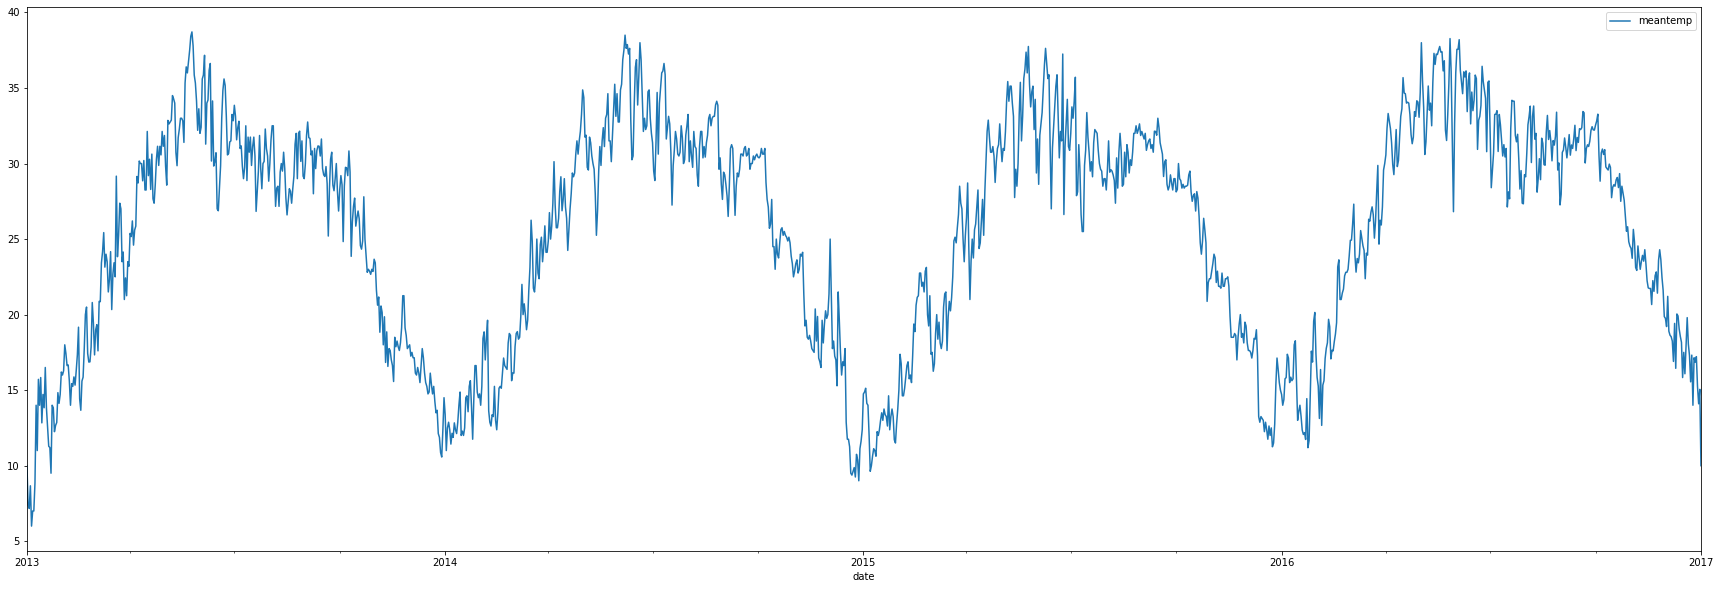

In [84]:
df_train.plot('date','meantemp',figsize=(30,10))

In [86]:
df_train=df_train.rename(columns={'date':'ds','meantemp':'y'})
df_test=df_test.rename(columns={'date':'ds','meantemp':'y'})
df_train.head()

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [87]:
model=Prophet()

In [88]:
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph7q61psj/l_8pgft2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph7q61psj/03r2g7tp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48168', 'data', 'file=/tmp/tmph7q61psj/l_8pgft2.json', 'init=/tmp/tmph7q61psj/03r2g7tp.json', 'output', 'file=/tmp/tmph7q61psj/prophet_modelwo3p2f0q/prophet_model-20221224180728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:07:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:07:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [89]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [90]:
df_train.tail()

,ds,y,humidity,wind_speed,meanpressure
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000
1461,2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [91]:
df_test.head()

,ds,y,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [92]:
df_test.tail()

,ds,y,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [93]:
df_test.shape

(114, 5)

In [94]:
future_dates=model.make_future_dataframe(periods=365)

In [95]:
future_dates.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [96]:
future_dates.tail()

,ds
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31
1826,2018-01-01


In [97]:
prediction=model.predict(future_dates)

In [98]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.675634,9.152021,14.234413,24.675634,24.675634,-12.939688,-12.939688,-12.939688,0.034100,0.034100,0.034100,-12.973789,-12.973789,-12.973789,0.0,0.0,0.0,11.735946
1,2013-01-02,24.675880,9.333850,14.619022,24.675880,24.675880,-12.803792,-12.803792,-12.803792,0.146300,0.146300,0.146300,-12.950092,-12.950092,-12.950092,0.0,0.0,0.0,11.872088
2,2013-01-03,24.676125,9.221599,14.324750,24.676125,24.676125,-12.843989,-12.843989,-12.843989,0.067168,0.067168,0.067168,-12.911157,-12.911157,-12.911157,0.0,0.0,0.0,11.832137
3,2013-01-04,24.676371,9.342612,14.396837,24.676371,24.676371,-12.831412,-12.831412,-12.831412,0.027521,0.027521,0.027521,-12.858932,-12.858932,-12.858932,0.0,0.0,0.0,11.844959
4,2013-01-05,24.676616,9.137067,14.394826,24.676616,24.676616,-12.864568,-12.864568,-12.864568,-0.069157,-0.069157,-0.069157,-12.795412,-12.795412,-12.795412,0.0,0.0,0.0,11.812048


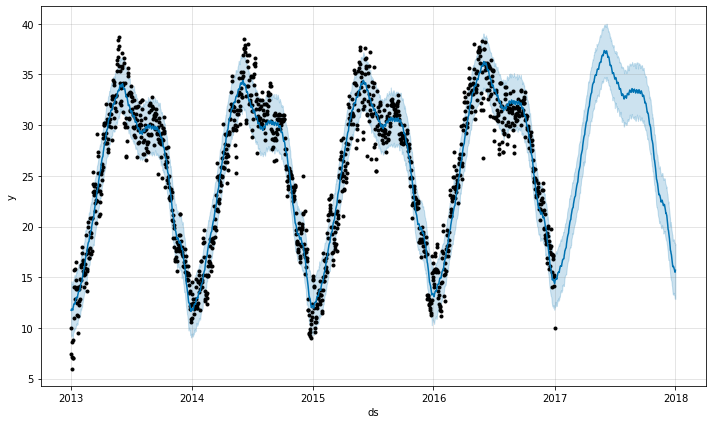

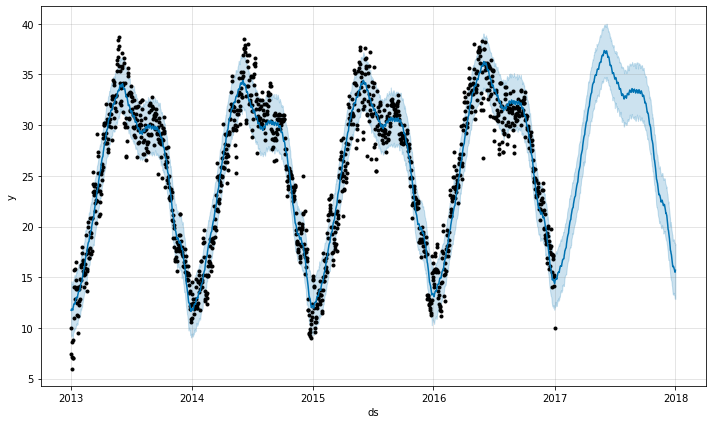

In [99]:
model.plot(prediction)

In [100]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model,prediction)

In [101]:
prediction_test=model.predict(df_test)

In [102]:
prediction_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,27.553546,11.899962,17.044723,27.553546,27.553546,-13.168905,-13.168905,-13.168905,-0.195117,-0.195117,-0.195117,-12.973789,-12.973789,-12.973789,0.0,0.0,0.0,14.384641
1,2017-01-02,27.556623,12.156265,17.153510,27.556623,27.556623,-12.960908,-12.960908,-12.960908,-0.010816,-0.010816,-0.010816,-12.950092,-12.950092,-12.950092,0.0,0.0,0.0,14.595715
2,2017-01-03,27.559700,11.998971,17.267631,27.559700,27.559700,-12.877057,-12.877057,-12.877057,0.034100,0.034100,0.034100,-12.911157,-12.911157,-12.911157,0.0,0.0,0.0,14.682643
3,2017-01-04,27.562776,11.988571,17.147970,27.562776,27.562776,-12.712632,-12.712632,-12.712632,0.146300,0.146300,0.146300,-12.858932,-12.858932,-12.858932,0.0,0.0,0.0,14.850144
4,2017-01-05,27.565853,12.213259,17.474014,27.565853,27.565853,-12.728243,-12.728243,-12.728243,0.067168,0.067168,0.067168,-12.795412,-12.795412,-12.795412,0.0,0.0,0.0,14.837610


In [71]:
df_test.head()

,ds,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [105]:
extracted_col=prediction_test['yhat']
df_test.insert(2,'yhat',extracted_col)
df_test.head()

,ds,y,yhat,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,14.384641,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,14.595715,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,14.682643,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,14.850144,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,14.837610,74.944444,3.300000,1014.333333


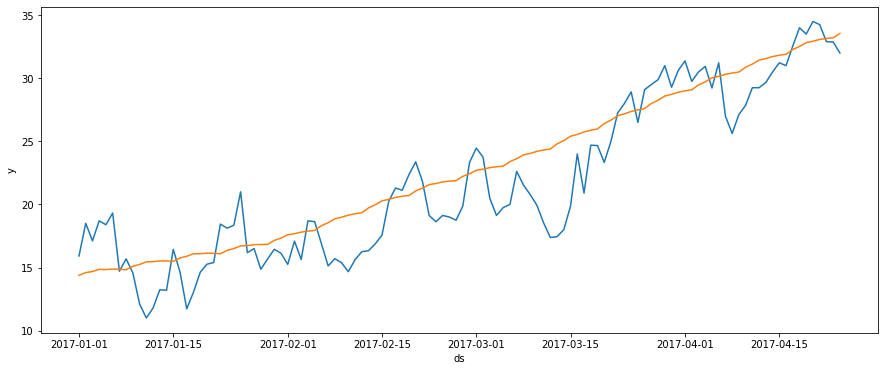

In [113]:
plt.figure(figsize=(15,6))
sns.lineplot(x='ds',y='y',data=df_test)
sns.lineplot(x='ds',y='yhat',data=df_test)

In [68]:
df_test['ds'].plot(y='meantemp',label='meantemp',figsize=(15,6))
prediction_test['ds'].plot(label='yhat')

TypeError: ignored

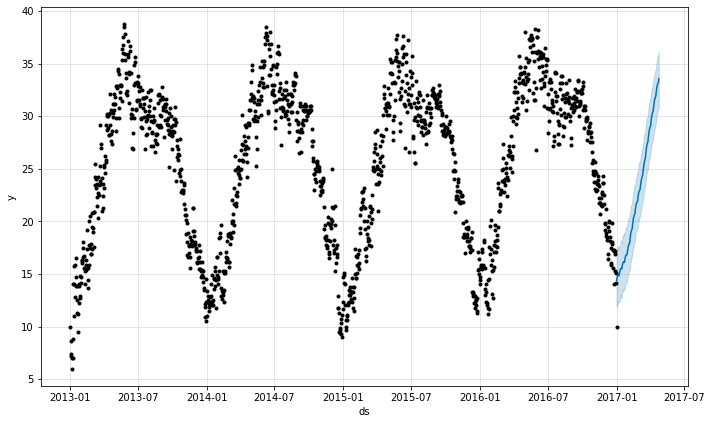

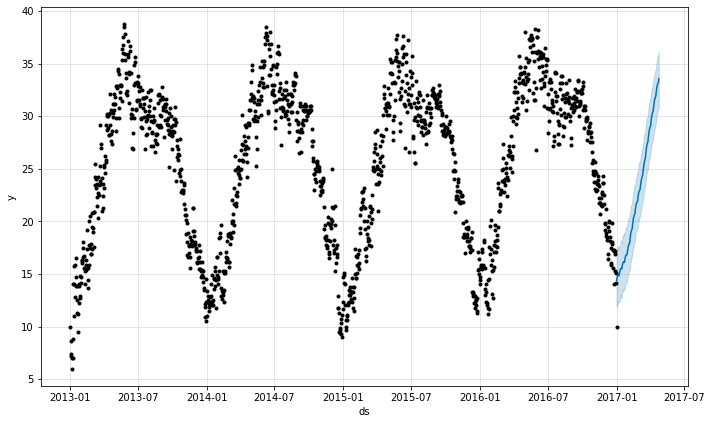

In [59]:
model.plot(prediction_test)

In [61]:
prediction_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,27.553546,11.917882,17.148198,27.553546,27.553546,-13.168905,-13.168905,-13.168905,-0.195117,-0.195117,-0.195117,-12.973789,-12.973789,-12.973789,0.0,0.0,0.0,14.384641
1,2017-01-02,27.556623,11.838175,17.068697,27.556623,27.556623,-12.960908,-12.960908,-12.960908,-0.010816,-0.010816,-0.010816,-12.950092,-12.950092,-12.950092,0.0,0.0,0.0,14.595715
2,2017-01-03,27.559700,12.006859,17.305971,27.559700,27.559700,-12.877057,-12.877057,-12.877057,0.034100,0.034100,0.034100,-12.911157,-12.911157,-12.911157,0.0,0.0,0.0,14.682643
3,2017-01-04,27.562776,12.198297,17.618987,27.562776,27.562776,-12.712632,-12.712632,-12.712632,0.146300,0.146300,0.146300,-12.858932,-12.858932,-12.858932,0.0,0.0,0.0,14.850144
4,2017-01-05,27.565853,12.254978,17.519861,27.565853,27.565853,-12.728243,-12.728243,-12.728243,0.067168,0.067168,0.067168,-12.795412,-12.795412,-12.795412,0.0,0.0,0.0,14.837610
